### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.
https://github.com/crialorob/Alonso_Robles_Cristina_DA201_Assignment

# 

# Assignment activity 2

### Prepare your workstation

In [106]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [108]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [109]:
# Determine the sum of missing values in the 'ad' DataFrame.
ad['actual_duration'].isnull().sum()

0

There are invalid values in the 'actual_duration' column, identified as'Unknown / Data Quality'.

Python does not identify them as missing values.

In [5]:
ad['actual_duration'].isnull().sum()

0

In [6]:
# Filter the 'ad' DataFrame according to invalid values.
# There are invalid values in the 'actual_duration' column, identified as'Unknown / Data Quality'.
ad[ad['actual_duration'].str.contains('Unknown / Data Quality')]

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
8,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,02-Dec-21,Unknown / Data Quality,1391
17,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,03-Dec-21,Unknown / Data Quality,1237
24,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,04-Dec-21,Unknown / Data Quality,41
34,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,06-Dec-21,Unknown / Data Quality,1502
...,...,...,...,...,...,...,...,...
137758,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,25-Jun-22,Unknown / Data Quality,60
137765,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,27-Jun-22,Unknown / Data Quality,2616
137772,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,28-Jun-22,Unknown / Data Quality,2815
137779,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,29-Jun-22,Unknown / Data Quality,2256


In [7]:
# Determine the metadata of the data set.
print(ad.columns)
print(ad.shape)
print(ad.dtypes)
ad.info()

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_co

In [8]:
# Determine the descriptive statistics of the ad data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [9]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [10]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

There are invalid/erroneous values in the 'appointment_status' and in the 'hcp_type' columns, identified as 'Unknown'.

There are also invalid values in the 'time_between_book_and_appointment' column, identified as 'Unknown / Data Quality'.

Python does not identify them as missing values.

In [11]:
# Determine the sum of missing values.
ar['appointment_status'].isnull().sum()
ar['hcp_type'].isnull().sum()
ar['time_between_book_and_appointment'].isnull().sum()

0

In [12]:
# Filter the 'ar' DataFrame according to invalid values 
# This will allow me to better understand the scale of these invalid values.
# There are invalid values in the 'appointment_status' column, identified as 'Unknown'. 
ar[ar['appointment_status'].str.contains("Unknown")]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
124,E54000034,2020-01,Unknown,GP,Face-to-Face,1 Day,264
125,E54000034,2020-01,Unknown,GP,Face-to-Face,15 to 21 Days,706
126,E54000034,2020-01,Unknown,GP,Face-to-Face,2 to 7 Days,682
127,E54000034,2020-01,Unknown,GP,Face-to-Face,22 to 28 Days,702
128,E54000034,2020-01,Unknown,GP,Face-to-Face,8 to 14 Days,682
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [13]:
# Filter the 'ar' DataFrame according to invalid values.
# There are wrong values in the 'hcp_type' column, identified as 'Unknown'. 
ar[ar['hcp_type'].str.contains("Unknown")]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
58,E54000034,2020-01,Attended,Unknown,Face-to-Face,1 Day,77
59,E54000034,2020-01,Attended,Unknown,Face-to-Face,15 to 21 Days,3
60,E54000034,2020-01,Attended,Unknown,Face-to-Face,2 to 7 Days,80
61,E54000034,2020-01,Attended,Unknown,Face-to-Face,22 to 28 Days,1
62,E54000034,2020-01,Attended,Unknown,Face-to-Face,8 to 14 Days,29
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [14]:
# Filter the 'ar' DataFrame according to invalid values.
# There are invalid values in the 'time_between_book_and_appointment' column, identified as 'Unknown / Data Quality'.
ar[ar['time_between_book_and_appointment'].str.contains('Unknown / Data Quality')]

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
21,E54000034,2020-01,Attended,GP,Telephone,Unknown / Data Quality,2
36,E54000034,2020-01,Attended,Other Practice staff,Face-to-Face,Unknown / Data Quality,8
119,E54000034,2020-01,DNA,Other Practice staff,Unknown,Unknown / Data Quality,2
131,E54000034,2020-01,Unknown,GP,Face-to-Face,Unknown / Data Quality,30
144,E54000034,2020-01,Unknown,GP,Telephone,Unknown / Data Quality,3
...,...,...,...,...,...,...,...
596651,E54000050,2022-06,Attended,GP,Face-to-Face,Unknown / Data Quality,29
596658,E54000050,2022-06,Attended,GP,Home Visit,Unknown / Data Quality,4
596673,E54000050,2022-06,Attended,Other Practice staff,Face-to-Face,Unknown / Data Quality,2
596698,E54000050,2022-06,Attended,Unknown,Face-to-Face,Unknown / Data Quality,1


In [15]:
# Determine the metadata of the data set.
print(ar.columns)
print(ar.shape)
print(ar.dtypes)
ar.info()

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                          

In [16]:
# Determine the descriptive statistics of the ar data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [17]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05
...,...,...,...,...,...,...,...,...
817389,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,1,2022-06
817390,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Unplanned Clinical Activity,1,2022-06
817391,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Group Consultation and Group Education,1,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Care Home Visit,1,2022-06


In [18]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

There are invalid values in the 'service_setting' column, identified as 'Unmapped'.

There are also invalid values in the 'context_type' and 'national_category' columns, identified as 'Inconsistent Mapping' and 'Unmapped'.

Python does not identify them as missing values.

In [19]:
# Determine the sum of missing values in the 'ar' DataFrame.
nc['service_setting'].isnull().sum()
nc['context_type'].isnull().sum()
nc['national_category'].isnull().sum()

0

In [20]:
# Filter the 'nc' DataFrame according to invalid values.
# There are invalid values in the 'service_setting' column, identified as 'Unmapped'.

nc[nc['service_setting'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


In [21]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'context_type' column, identified as 'Unmapped'.

nc[nc['context_type'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


In [22]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'context_type' column, identified as 'Inconsistent Mapping'.
nc[nc['context_type'].str.contains('Inconsistent Mapping')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
6444,2021-11-15,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6206,2021-11
6449,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6205,2021-10
6548,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,6156,2021-10
6578,2021-10-04,E54000030,NHS South East London ICB - 72Q,General Practice,Inconsistent Mapping,Inconsistent Mapping,6138,2021-10
6599,2021-11-08,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6129,2021-11
...,...,...,...,...,...,...,...,...
817112,2022-01-03,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817130,2022-01-15,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817259,2022-03-26,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-03
817320,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-05


In [23]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'national_category' column, identified as 'Inconsistent Mapping'.
nc[nc['national_category'].str.contains('Inconsistent Mapping')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
6444,2021-11-15,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6206,2021-11
6449,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6205,2021-10
6548,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,6156,2021-10
6578,2021-10-04,E54000030,NHS South East London ICB - 72Q,General Practice,Inconsistent Mapping,Inconsistent Mapping,6138,2021-10
6599,2021-11-08,E54000029,NHS North East London ICB - A3A8R,General Practice,Inconsistent Mapping,Inconsistent Mapping,6129,2021-11
...,...,...,...,...,...,...,...,...
817112,2022-01-03,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817130,2022-01-15,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
817259,2022-03-26,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-03
817320,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Inconsistent Mapping,Inconsistent Mapping,1,2022-05


In [24]:
# Filter the 'nc' DataFrame according to invalid values.
# There are also invalid values in the 'national_category' column, identified as 'Unmapped'.

nc[nc['national_category'].str.contains('Unmapped')]

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
13558,2021-10-11,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4387,2021-10
13578,2021-10-19,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4384,2021-10
13902,2021-10-12,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4329,2021-10
14085,2021-08-09,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4298,2021-08
14137,2021-09-20,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,4290,2021-09
...,...,...,...,...,...,...,...,...
817319,2022-05-07,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817340,2022-05-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-05
817360,2022-06-11,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06
817368,2022-06-18,E54000054,NHS West Yorkshire ICB - X2C4Y,Unmapped,Unmapped,Unmapped,1,2022-06


In [25]:
# Determine the metadata of the data set.
print(nc.columns)
print(nc.shape)
print(nc.dtypes)
nc.info()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 no

In [26]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [27]:
# Determine the number of locations.
# Get Unique Count of Locations from the 'ad' DataFrame.
count = ad.sub_icb_location_name.unique().size
print("Count of locations : "+ str(count))

Count of locations : 106


**Question 2:** What are the five locations with the highest number of records?



In [28]:
# Sorting the data by 'count_of_appointments' to find the 5 locations with the highest number of records.
nc.sort_values(by=['count_of_appointments'], ascending=False)
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [29]:
# Grouping the nc DataFrame by 'sub_icb_location_name' and counting the number of rows for each location.
locations_count = pd.DataFrame(nc.groupby(['sub_icb_location_name']).count())
locations_count

,appointment_date,icb_ons_code,service_setting,context_type,national_category,count_of_appointments,appointment_month
sub_icb_location_name,,,,,,,
NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G,11545,11545,11545,11545,11545,11545,11545
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y,9490,9490,9490,9490,9490,9490,9490
NHS Birmingham and Solihull ICB - 15E,11789,11789,11789,11789,11789,11789,11789
NHS Black Country ICB - D2P2L,11776,11776,11776,11776,11776,11776,11776
NHS Bristol North Somerset and South Gloucestershire ICB - 15C,9673,9673,9673,9673,9673,9673,9673
...,...,...,...,...,...,...,...
NHS West Yorkshire ICB - 02T,7072,7072,7072,7072,7072,7072,7072
NHS West Yorkshire ICB - 03R,7990,7990,7990,7990,7990,7990,7990
NHS West Yorkshire ICB - 15F,9478,9478,9478,9478,9478,9478,9478


In [30]:
# Sorting the nc DataFrame by 'icb_ons_code' in descending order. 
# (Any of the columns could be chosen, since all of them have the same count of records).
locations_count.sort_values(['icb_ons_code'],ascending=False)

,appointment_date,icb_ons_code,service_setting,context_type,national_category,count_of_appointments,appointment_month
sub_icb_location_name,,,,,,,
NHS North West London ICB - W2U3Z,13007,13007,13007,13007,13007,13007,13007
NHS Kent and Medway ICB - 91Q,12637,12637,12637,12637,12637,12637,12637
NHS Devon ICB - 15N,12526,12526,12526,12526,12526,12526,12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171,12171,12171,12171,12171,12171,12171
NHS North East London ICB - A3A8R,11837,11837,11837,11837,11837,11837,11837
...,...,...,...,...,...,...,...
NHS North East and North Cumbria ICB - 00N,4210,4210,4210,4210,4210,4210,4210
NHS Lancashire and South Cumbria ICB - 02G,4169,4169,4169,4169,4169,4169,4169
NHS Cheshire and Merseyside ICB - 01V,3496,3496,3496,3496,3496,3496,3496


In [31]:
# Determine the top five locations based on record count.
top_5_locations = locations_count.sort_values(['icb_ons_code'],ascending=False)
top_5_locations.head()

,appointment_date,icb_ons_code,service_setting,context_type,national_category,count_of_appointments,appointment_month
sub_icb_location_name,,,,,,,
NHS North West London ICB - W2U3Z,13007,13007,13007,13007,13007,13007,13007
NHS Kent and Medway ICB - 91Q,12637,12637,12637,12637,12637,12637,12637
NHS Devon ICB - 15N,12526,12526,12526,12526,12526,12526,12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171,12171,12171,12171,12171,12171,12171
NHS North East London ICB - A3A8R,11837,11837,11837,11837,11837,11837,11837


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [32]:
# Determine the number of service settings.
# Determine the number of service settings from the 'nc' DataFrame.
print(len(nc['service_setting'].unique()))

5


In [33]:
# Determine the number of context types from the 'nc' DataFrame.
print(len(nc['context_type'].unique()))

3


In [34]:
# Determine the number of national categories from the 'nc' DataFrame.
print(len(nc['national_category'].unique()))

18


In [35]:
# Determine the number of appointment statuses from the 'ar' DataFrame.
print(len(ar['appointment_status'].unique()))

3


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

In [36]:
# Before I move on with the analysis. 
# I would like to search for duplicates values in the ad DataFrame.
# No duplicates were found in the ad DataFrame.
ad.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
137788    False
137789    False
137790    False
137791    False
137792    False
Length: 137793, dtype: bool

In [37]:
# Searching for duplicates values in the ar DataFrame.
# 21,604 raws were found to be duplicated.
ar.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
596816    False
596817     True
596818    False
596819    False
596820     True
Length: 596821, dtype: bool

In [38]:
# Adding a new column to the ar dataframe that states whether the row is a duplicate.
ar2 = ar.copy()
ar2['duplicated'] = ar2.duplicated()
ar2

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,duplicated
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,False
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,False
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,False
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,False
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,False
...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21,False
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8,True
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28,False
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17,False


In [39]:
# De-duplicate the ar DataFrame using drop_duplicates().
# I decided to remove the 21,604 raws that were found to be duplicated in the ar DataFrame.
ar = ar.drop_duplicates()
ar.shape

(575217, 7)

In [40]:
# The 'ar' DataFrame has now 575,217 rows, containing zero duplicates.
ar.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
596813    False
596815    False
596816    False
596818    False
596819    False
Length: 575217, dtype: bool

In [41]:
# Searching for duplicates values in the nc DataFrame.
# No duplicates were found.
nc.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
817389    False
817390    False
817391    False
817392    False
817393    False
Length: 817394, dtype: bool

**Question 1:** Between what dates were appointments scheduled?

In [42]:
# Importing the nessesary modules.
import pandas as pd
import numpy as np
import datetime

In [43]:
# View the ar DataFrame and columns to determine the format of the dates.
print(ar.dtypes)

# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [44]:
# Change the date format of ar['appointment_month'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the ar DataFrame and columns to determine the format of the dates.
print(ar.dtypes)

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object


In [45]:
# View the ad DataFrame and columns to determine the format of the dates.
print(ad.dtypes)

# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [46]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the data types of the ad DateFrame.
print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [47]:
# View the nc DataFrame and columns to determine the format of the dates.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [48]:
# Change the date format of nc['appointment_month'].
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# View the data type of the nc DateFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month        datetime64[ns]
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05-01
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05-01
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10-01
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10-01
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05-01


#### Adding an additional column 'appointment_month' to the ad DataFrame.
#### This will allow me to compare the 3 DataFrames by looking at the 'total_monthly_appointments'.

In [49]:
#Extracting the year from string format date.
ad['year'] = pd.DatetimeIndex(ad['appointment_date']).year
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021


In [50]:
# Creating a new column with month of date field 'appointment_date'.
ad['month'] = pd.DatetimeIndex(ad['appointment_date']).month
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021,12
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021,12
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021,12
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021,12


In [51]:
# Extracting the day/month/year using the to_period function.
# Where 'D', 'M', 'Y' are inputs.
ad['appointment_month'] = pd.to_datetime(ad['appointment_date']).dt.to_period('M')
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,appointment_month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12,2021-12
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021,12,2021-12
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021,12,2021-12
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021,12,2021-12
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021,12,2021-12


In [52]:
ad['appointment_month'] = pd.to_datetime(ad['appointment_date'])
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,appointment_month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12,2021-12-01
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021,12,2021-12-01
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021,12,2021-12-01
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021,12,2021-12-01
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021,12,2021-12-01


In [53]:
# View the ad DataFrame and columns to determine the format of the dates.
print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
year                                  int64
month                                 int64
appointment_month            datetime64[ns]
dtype: object


In [54]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 
print(ad['appointment_month'].sort_values())

# Determine min value (statistical method).
print(ad['appointment_month'].min())
ad.head()

0        2021-12-01
68150    2021-12-01
68149    2021-12-01
68148    2021-12-01
68147    2021-12-01
            ...    
27712    2022-06-30
27713    2022-06-30
27714    2022-06-30
120088   2022-06-30
137792   2022-06-30
Name: appointment_month, Length: 137793, dtype: datetime64[ns]
2021-12-01 00:00:00


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,appointment_month
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12,2021-12-01
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021,12,2021-12-01
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021,12,2021-12-01
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021,12,2021-12-01
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021,12,2021-12-01


In [55]:
# Determine the last (e.g. max()) date of scheduled appointments for the ad DataFrame.
# Determine max value (statistical method).
print(ad['appointment_month'].max())
ad.tail()

2022-06-30 00:00:00


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,appointment_month
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430,2022,6,2022-06-30
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751,2022,6,2022-06-30
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921,2022,6,2022-06-30
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439,2022,6,2022-06-30
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,1-5 Minutes,1739,2022,6,2022-06-30


In [56]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 

print(nc['appointment_date'].sort_values())

# Determine min value (statistical method).
print(nc['appointment_date'].min())
nc.head()

405235   2021-08-01
257948   2021-08-01
756969   2021-08-01
682607   2021-08-01
663057   2021-08-01
            ...    
283818   2022-06-30
284599   2022-06-30
284880   2022-06-30
282796   2022-06-30
817393   2022-06-30
Name: appointment_date, Length: 817394, dtype: datetime64[ns]
2021-08-01 00:00:00


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05-01
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05-01
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10-01
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10-01
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05-01


In [57]:
# Determine the last (e.g. max()) date of scheduled appointments for the nc DataFrame.
# Determine max value (statistical method).
print(nc['appointment_date'].max())
nc.tail()

2022-06-30 00:00:00


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Social Prescribing Service,1,2022-06-01
817390,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,Other,Care Related Encounter,Unplanned Clinical Activity,1,2022-06-01
817391,2022-06-29,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Group Consultation and Group Education,1,2022-06-01
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Care Home Visit,1,2022-06-01
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,General Practice,Care Related Encounter,Non-contractual chargeable work,1,2022-06-01


In [58]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 

print(ar['appointment_month'].sort_values())

# Determine min value (statistical method).
print(ar['appointment_month'].min())
ar.head()

0        2020-01-01
55179    2020-01-01
55177    2020-01-01
55176    2020-01-01
55175    2020-01-01
            ...    
190844   2022-06-01
190845   2022-06-01
190846   2022-06-01
190831   2022-06-01
596819   2022-06-01
Name: appointment_month, Length: 575217, dtype: datetime64[ns]
2020-01-01 00:00:00


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [59]:
# Determine the last (e.g. max()) date of scheduled appointments for the nc DataFrame.
# Determine max value (statistical method).
print(ar['appointment_month'].max())
ar.tail()

2022-06-01 00:00:00


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596813,E54000050,2022-06-01,Unknown,Unknown,Telephone,Same Day,10
596815,E54000050,2022-06-01,Unknown,Unknown,Unknown,15 to 21 Days,13
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [60]:
# Create a subset of the nc DataFrame.
# Selecting few columns.
nc_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['sub_icb_location_name', 'service_setting', 'count_of_appointments', 'appointment_date'])

# Print the DataFrame.
nc_subset.head()

,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
0,2022-05-09,NHS North East London ICB - A3A8R,General Practice,16590
1,2022-05-23,NHS North East London ICB - A3A8R,General Practice,16527
2,2021-10-11,NHS North East London ICB - A3A8R,General Practice,16495
3,2021-10-18,NHS North East London ICB - A3A8R,General Practice,16492
4,2022-05-16,NHS North East London ICB - A3A8R,General Practice,16412


In [62]:
# View the nc DataFrame and columns to determine the format of the dates.
print(nc_subset.dtypes)

appointment_date         datetime64[ns]
sub_icb_location_name            object
service_setting                  object
count_of_appointments             int64
dtype: object


In [63]:
# Filtering the DataFrame by the specific dates, from 1 January to 1 June 2022.
nc_subset[(nc_subset['appointment_date'] > '2022-01-01') & (nc_subset['appointment_date'] < '2022-06-01')]

,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
0,2022-05-09,NHS North East London ICB - A3A8R,General Practice,16590
1,2022-05-23,NHS North East London ICB - A3A8R,General Practice,16527
4,2022-05-16,NHS North East London ICB - A3A8R,General Practice,16412
7,2022-02-28,NHS North East London ICB - A3A8R,General Practice,16283
11,2022-03-07,NHS North East London ICB - A3A8R,General Practice,16116
...,...,...,...,...
817347,2022-05-27,NHS West Yorkshire ICB - X2C4Y,General Practice,1
817348,2022-05-27,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,1
817349,2022-05-28,NHS West Yorkshire ICB - X2C4Y,General Practice,1
817350,2022-05-28,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,1


In [64]:
# Sorting the data by ''NHS North West London ICB - W2U3'.
nc_subset.loc[nc_subset['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')]

,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
40,2022-06-13,NHS North West London ICB - W2U3Z,General Practice,15324
47,2022-05-16,NHS North West London ICB - W2U3Z,General Practice,15056
51,2022-05-09,NHS North West London ICB - W2U3Z,General Practice,14964
56,2022-05-23,NHS North West London ICB - W2U3Z,General Practice,14907
58,2022-05-17,NHS North West London ICB - W2U3Z,General Practice,14904
...,...,...,...,...
816875,2022-06-23,NHS North West London ICB - W2U3Z,Other,1
816876,2022-06-28,NHS North West London ICB - W2U3Z,Primary Care Network,1
816877,2022-06-29,NHS North West London ICB - W2U3Z,Primary Care Network,1
816878,2022-06-29,NHS North West London ICB - W2U3Z,Extended Access Provision,1


In [71]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Count the number of records per service_setting.
ss_count = nc_subset.loc[nc_subset['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')].groupby(['service_setting']).count()
ss_count.sort_values(['count_of_appointments'],ascending=False)
most_popular_ss = ss_count.sort_values(['count_of_appointments'],ascending=False)

# View the output.
most_popular_ss

,appointment_date,sub_icb_location_name,count_of_appointments
service_setting,,,
General Practice,4609,4609,4609
Other,2858,2858,2858
Primary Care Network,2791,2791,2791
Extended Access Provision,2415,2415,2415
Unmapped,334,334,334


**Question 3:** Which month had the highest number of appointments?

Before I can give answers to the following questions, since these questions are not specific to any DataFrame, I assume that these questions refer to the three DataFrames as a whole, so I will merge the three DataFrames.

To be able to merge the three DataFrames, we should have comparable inputs in terms of 'count of apppointmets', being aggregated to monthly counts and the same number of rows in all the DataFrames to be merged.

##### Q: I grouped the ar DataFrame
#### I want to create a subset of the ar DataFrame that includes this new column of total_monthly_appointments
#### Come back and add all the columns I want to have in the merged DataFrame.
    

In [72]:
# Grouping the ar DataFrame by 'icb_ons_code' and 'appointment_month'.
# And aggregating the 'count of appointments' to total monthly appointments.
total_m_apt_ar = pd.DataFrame(ar.groupby(['icb_ons_code' ,'appointment_status', 'hcp_type', 'appointment_mode', 'appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
total_m_apt_ar.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,appointment_status,hcp_type,appointment_mode,appointment_month,total_monthly_appointments
31743,E54000050,Attended,Other Practice staff,Face-to-Face,2021-10-01,653500
31744,E54000050,Attended,Other Practice staff,Face-to-Face,2021-11-01,632339
31722,E54000050,Attended,Other Practice staff,Face-to-Face,2020-01-01,627829
31731,E54000050,Attended,Other Practice staff,Face-to-Face,2020-10-01,613784
31748,E54000050,Attended,Other Practice staff,Face-to-Face,2022-03-01,588417
...,...,...,...,...,...,...
20395,E54000034,DNA,Other Practice staff,Video/Online,2021-10-01,1
41837,E54000058,DNA,GP,Video/Online,2022-01-01,1
2812,E54000011,Attended,Unknown,Video/Online,2020-09-01,1
2813,E54000011,Attended,Unknown,Video/Online,2021-11-01,1


In [73]:
# Grouping the nc DataFrame by 'icb_ons_code' and 'appointment_month'.
# And aggregating the 'count of appointments' to total monthly appointments.
total_m_apt_nc = pd.DataFrame(nc.groupby(['icb_ons_code' ,'service_setting', 'context_type', 'national_category']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
total_m_apt_nc.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,service_setting,context_type,national_category,total_monthly_appointments
1600,E54000050,General Practice,Care Related Encounter,General Consultation Routine,6314508
2000,E54000057,General Practice,Care Related Encounter,General Consultation Routine,4382826
1834,E54000054,General Practice,Care Related Encounter,General Consultation Routine,4321215
14,E54000008,General Practice,Care Related Encounter,General Consultation Routine,4221448
782,E54000029,General Practice,Care Related Encounter,General Consultation Routine,3208001
...,...,...,...,...,...
162,E54000013,Extended Access Provision,Care Related Encounter,Home Visit,1
566,E54000025,Other,Care Related Encounter,Group Consultation and Group Education,1
756,E54000028,Primary Care Network,Care Related Encounter,Group Consultation and Group Education,1
1390,E54000042,Other,Care Related Encounter,Care Home Visit,1


In [74]:
# Grouping the ad DataFrame by 'icb_ons_code' and 'appointment_month'.
# And aggregating the 'count of appointments' to total monthly appointments.
total_m_apt_ad = pd.DataFrame(ad.groupby(['icb_ons_code' ,'sub_icb_location_name', 'actual_duration']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
total_m_apt_ad.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,sub_icb_location_name,actual_duration,total_monthly_appointments
265,E54000029,NHS North East London ICB - A3A8R,Unknown / Data Quality,1831258
251,E54000027,NHS North West London ICB - W2U3Z,Unknown / Data Quality,1746794
250,E54000027,NHS North West London ICB - W2U3Z,6-10 Minutes,1408906
258,E54000028,NHS North Central London ICB - 93C,Unknown / Data Quality,1393313
286,E54000032,NHS Kent and Medway ICB - 91Q,Unknown / Data Quality,1345784
...,...,...,...,...
697,E54000060,NHS Nottingham and Nottinghamshire ICB - 02Q,31-60 Minutes,15622
4,E54000008,NHS Cheshire and Merseyside ICB - 01F,31-60 Minutes,14875
424,E54000048,NHS Lancashire and South Cumbria ICB - 02G,31-60 Minutes,13684
445,E54000050,NHS North East and North Cumbria ICB - 00N,31-60 Minutes,12799


In [75]:
# Merging the nc and the ar DataFrames.
total_m_apt_nc_ar = pd.merge(total_m_apt_nc, total_m_apt_ar, how='inner', on ='icb_ons_code')

# View the new DataFrame.
total_m_apt_nc_ar.head()

,icb_ons_code,service_setting,context_type,national_category,total_monthly_appointments_x,appointment_status,hcp_type,appointment_mode,appointment_month,total_monthly_appointments_y
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,11363,Attended,GP,Face-to-Face,2020-01-01,484469
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,11363,Attended,GP,Face-to-Face,2020-02-01,416292
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,11363,Attended,GP,Face-to-Face,2020-03-01,286531
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,11363,Attended,GP,Face-to-Face,2020-04-01,98091
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,11363,Attended,GP,Face-to-Face,2020-05-01,115189


In [76]:
# Drop the total 'total_monthly_appointments_x'.
new_total_m_apt_nc_ar = total_m_apt_nc_ar.drop(columns=total_m_apt_nc_ar.columns[4])

# Print the modified dataframe.
new_total_m_apt_nc_ar.head()

,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,total_monthly_appointments_y
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-02-01,416292
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-03-01,286531
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-04-01,98091
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-05-01,115189


In [77]:
# Print the shape of the dataframe.
new_total_m_apt_nc_ar.shape

(2603610, 9)

In [78]:
# Searching for duplicates values in the ar DataFrame.
# No duplicates were found to be duplicated.
new_total_m_apt_nc_ar.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2603605    False
2603606    False
2603607    False
2603608    False
2603609    False
Length: 2603610, dtype: bool

In [79]:
# Merging the 'new_total_m_apt_nc_ar' and the 'total_m_apt_ad' DataFrames.
total_m_apt_nc_ar_ad = pd.merge(new_total_m_apt_nc_ar, total_m_apt_ad, how='inner', on ='icb_ons_code')
total_m_apt_nc_ar_ad.head()

,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,total_monthly_appointments_y,sub_icb_location_name,actual_duration,total_monthly_appointments
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469,NHS Cheshire and Merseyside ICB - 01F,1-5 Minutes,42523
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469,NHS Cheshire and Merseyside ICB - 01F,11-15 Minutes,39640
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469,NHS Cheshire and Merseyside ICB - 01F,16-20 Minutes,24997
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469,NHS Cheshire and Merseyside ICB - 01F,21-30 Minutes,23460
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,484469,NHS Cheshire and Merseyside ICB - 01F,31-60 Minutes,14875


In [80]:
# Print the shape of the dataframe.
total_m_apt_nc_ar_ad.shape

(48897758, 12)

In [81]:
# Drop the total 'total_monthly_appointments_y'.
new_total_m_apt_nc_ar_ad = total_m_apt_nc_ar_ad.drop(columns=total_m_apt_nc_ar.columns[9])

# Print the modified dataframe.
new_total_m_apt_nc_ar_ad.head()

,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,1-5 Minutes,42523
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,11-15 Minutes,39640
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,16-20 Minutes,24997
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,21-30 Minutes,23460
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,31-60 Minutes,14875


In [82]:
# Searching for duplicates values in the ar DataFrame.
# No duplicates were found to be duplicated.
new_total_m_apt_nc_ar_ad.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
48897753    False
48897754    False
48897755    False
48897756    False
48897757    False
Length: 48897758, dtype: bool

#### Even though I already gave answers to the following questions by looking at each DataFrame individually.
#### I want to see the outputs generated from the new merged DataFrame.

#### Between what dates were appointments scheduled?

In [83]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
# Sort column from low to high to determine. 
print(new_total_m_apt_nc_ar_ad['appointment_month'].sort_values())

# Determine min value (statistical method).
print(new_total_m_apt_nc_ar_ad['appointment_month'].min())
new_total_m_apt_nc_ar_ad.head()

0          2020-01-01
16838347   2020-01-01
16838348   2020-01-01
16838349   2020-01-01
16838350   2020-01-01
              ...    
18132925   2022-06-01
18132924   2022-06-01
18132923   2022-06-01
18132921   2022-06-01
48897757   2022-06-01
Name: appointment_month, Length: 48897758, dtype: datetime64[ns]
2020-01-01 00:00:00


,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,1-5 Minutes,42523
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,11-15 Minutes,39640
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,16-20 Minutes,24997
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,21-30 Minutes,23460
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,31-60 Minutes,14875


In [84]:
# Determine the last (e.g. max()) date of scheduled appointments for the nc DataFrame.
# Determine max value (statistical method).
print(new_total_m_apt_nc_ar_ad['appointment_month'].max())
print(new_total_m_apt_nc_ar_ad.dtypes)
new_total_m_apt_nc_ar_ad.tail()

2022-06-01 00:00:00
icb_ons_code                          object
service_setting                       object
context_type                          object
national_category                     object
appointment_status                    object
hcp_type                              object
appointment_mode                      object
appointment_month             datetime64[ns]
sub_icb_location_name                 object
actual_duration                       object
total_monthly_appointments             int64
dtype: object


,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
48897753,E54000062,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Unknown,2022-06-01,NHS Black Country ICB - D2P2L,16-20 Minutes,344050
48897754,E54000062,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Unknown,2022-06-01,NHS Black Country ICB - D2P2L,21-30 Minutes,320571
48897755,E54000062,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Unknown,2022-06-01,NHS Black Country ICB - D2P2L,31-60 Minutes,203424
48897756,E54000062,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Unknown,2022-06-01,NHS Black Country ICB - D2P2L,6-10 Minutes,735590
48897757,E54000062,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Unknown,2022-06-01,NHS Black Country ICB - D2P2L,Unknown / Data Quality,1148089


In [85]:
# Sorting the data by ''NHS North West London ICB - W2U3'.
new_total_m_apt_nc_ar_ad.loc[new_total_m_apt_nc_ar_ad['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')]

,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
15764749,E54000027,Extended Access Provision,Care Related Encounter,Care Home Visit,Attended,GP,Face-to-Face,2020-01-01,NHS North West London ICB - W2U3Z,1-5 Minutes,1328946
15764750,E54000027,Extended Access Provision,Care Related Encounter,Care Home Visit,Attended,GP,Face-to-Face,2020-01-01,NHS North West London ICB - W2U3Z,11-15 Minutes,982611
15764751,E54000027,Extended Access Provision,Care Related Encounter,Care Home Visit,Attended,GP,Face-to-Face,2020-01-01,NHS North West London ICB - W2U3Z,16-20 Minutes,593838
15764752,E54000027,Extended Access Provision,Care Related Encounter,Care Home Visit,Attended,GP,Face-to-Face,2020-01-01,NHS North West London ICB - W2U3Z,21-30 Minutes,549131
15764753,E54000027,Extended Access Provision,Care Related Encounter,Care Home Visit,Attended,GP,Face-to-Face,2020-01-01,NHS North West London ICB - W2U3Z,31-60 Minutes,366760
...,...,...,...,...,...,...,...,...,...,...,...
16257768,E54000027,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Video/Online,2021-05-01,NHS North West London ICB - W2U3Z,16-20 Minutes,593838
16257769,E54000027,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Video/Online,2021-05-01,NHS North West London ICB - W2U3Z,21-30 Minutes,549131
16257770,E54000027,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Video/Online,2021-05-01,NHS North West London ICB - W2U3Z,31-60 Minutes,366760
16257771,E54000027,Unmapped,Unmapped,Unmapped,Unknown,Unknown,Video/Online,2021-05-01,NHS North West London ICB - W2U3Z,6-10 Minutes,1408906


In [86]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Count the number of records per service_setting.
new_ss_count = new_total_m_apt_nc_ar_ad.loc[new_total_m_apt_nc_ar_ad['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')].groupby(['service_setting']).count()
new_ss_count.sort_values(['total_monthly_appointments'],ascending=False)
new_most_popular_ss = new_ss_count.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
new_most_popular_ss

,icb_ons_code,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
service_setting,,,,,,,,,,
General Practice,135184,135184,135184,135184,135184,135184,135184,135184,135184,135184
Other,119280,119280,119280,119280,119280,119280,119280,119280,119280,119280
Primary Care Network,119280,119280,119280,119280,119280,119280,119280,119280,119280,119280
Extended Access Provision,111328,111328,111328,111328,111328,111328,111328,111328,111328,111328
Unmapped,7952,7952,7952,7952,7952,7952,7952,7952,7952,7952


#### 3. Which month had the highest number of appointments?

In [95]:
new_total_m_apt_nc_ar_ad.head()
month_highest_appt.sort_values(['total_monthly_appointments'],ascending=False)

,icb_ons_code,service_setting,context_type,national_category,appointment_status,hcp_type,appointment_mode,appointment_month,sub_icb_location_name,actual_duration,total_monthly_appointments
0,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,1-5 Minutes,42523
1,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,11-15 Minutes,39640
2,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,16-20 Minutes,24997
3,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,21-30 Minutes,23460
4,E54000008,Extended Access Provision,Care Related Encounter,Clinical Triage,Attended,GP,Face-to-Face,2020-01-01,NHS Cheshire and Merseyside ICB - 01F,31-60 Minutes,14875


In [99]:
month_highest_appt = pd.DataFrame(new_total_m_apt_nc_ar_ad.groupby(['appointment_month', 'total_monthly_appointments']))
month_highest_appt.sort_values(['total_monthly_appointments'],ascending=False)
month_highest_appt.head()

KeyError: 'total_monthly_appointments'

In [ ]:
# Grouping the nc DataFrame by 'icb_ons_code' and 'appointment_month'.
# And aggregating the 'count of appointments' to total monthly appointments.
month_highest_appt = pd.DataFrame(new_total_m_apt_nc_ar_ad.groupby(['appointment_month', 'total_monthly_appointments']))
month_highest_appt.sort_values(['total_monthly_appointments'],ascending=False)

In [ ]:
new_total_m_apt_nc_ar_ad.sort_values(by=['appointments_month'], ascending=False)

In [ ]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Count the number of records per service_setting.
new_ss_count = new_total_m_apt_nc_ar_ad.loc[new_total_m_apt_nc_ar_ad['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')].groupby(['service_setting']).count()
new_ss_count.sort_values(['total_monthly_appointments'],ascending=False)
new_most_popular_ss = new_ss_count.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
new_most_popular_ss


new_total_m_apt_nc_ar_ad.sort_values(by=['total_monthly_appointments'], ascending=False)

#### 4. What was the total number of records per month?

In [153]:
# Grouping the nc DataFrame by ''sub_icb_location_name' and 'appointment_month'.
# And aggregating the 'count of appointments' to monthly counts.

monthly_appointments_count = pd.DataFrame(nc.groupby(['sub_icb_location_name' ,'appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
monthly_appointments_count.sort_values(['total_monthly_appointments'],ascending=False)

,sub_icb_location_name,appointment_month,total_monthly_appointments
843,NHS North West London ICB - W2U3Z,2022-03-01,1232596
839,NHS North West London ICB - W2U3Z,2021-11-01,1204118
838,NHS North West London ICB - W2U3Z,2021-10-01,1180674
845,NHS North West London ICB - W2U3Z,2022-05-01,1163863
837,NHS North West London ICB - W2U3Z,2021-09-01,1144590
...,...,...,...
286,NHS Greater Manchester ICB - 00V,2021-08-01,47565
604,NHS Lancashire and South Cumbria ICB - 02G,2022-06-01,46965
600,NHS Lancashire and South Cumbria ICB - 02G,2022-02-01,46684
602,NHS Lancashire and South Cumbria ICB - 02G,2022-04-01,45216


In [25]:
# Grouping the ad DataFrame by 'sub_icb_location_name' and 'appointment_month'.
# And aggregating the 'count of appointments' to monthly counts.

ad_total_monthly_appointments_count = pd.DataFrame(ad.groupby(['sub_icb_location_name' ,'appointment_month']).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
monthly_appointments_count.sort_values(['total_monthly_appointments'],ascending=False)


,sub_icb_location_name,appointment_month,total_monthly_appointments
843,NHS North West London ICB - W2U3Z,2022-03,1232596
839,NHS North West London ICB - W2U3Z,2021-11,1204118
838,NHS North West London ICB - W2U3Z,2021-10,1180674
845,NHS North West London ICB - W2U3Z,2022-05,1163863
837,NHS North West London ICB - W2U3Z,2021-09,1144590
...,...,...,...
286,NHS Greater Manchester ICB - 00V,2021-08,47565
604,NHS Lancashire and South Cumbria ICB - 02G,2022-06,46965
600,NHS Lancashire and South Cumbria ICB - 02G,2022-02,46684
602,NHS Lancashire and South Cumbria ICB - 02G,2022-04,45216


In [ ]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions

* # For each of these service settings, determine the number of records available for the period and the location. 
# Count the number of records per service_setting.
ss_count = nc_subset.loc[nc_subset['sub_icb_location_name'].str.contains('NHS North West London ICB - W2U3')].groupby(['service_setting']).count()
ss_count.sort_values(['count_of_appointments'],ascending=False)
most_popular_ss = ss_count.sort_values(['count_of_appointments'],ascending=False)

# View the output.
most_popular_ss

In [105]:
# Grouping the merged DataFrame by 'appointment_month'.
# And aggregating the 'total_monthly_appointments' to 'TOTAL_Monthly Appointments'.

TOTAL_m_apt = pd.DataFrame(new_total_m_apt_nc_ar_ad.groupby(['appointment_month', 'total_monthly_appointments']))
TOTAL_m_apt.sort_values(['total_monthly_appointments'],ascending=False)

KeyError: 'total_monthly_appointments'

**Question 4:** What was the total number of records per month?

In [ ]:
# Total number of records per month.
new_total_m_apt_nc_ar_ad.sort_values(['appointment_month'],ascending=False)


# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [4]:
# Import the necessary Libraries.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [5]:
# Read the Excel file.
# Assign a variable.
# Use the pd.read_excel() function.
# Specify the name of the Excel file.
nc = pd.read_excel('national_categories.xlsx')

# Print the top 5 raws of the nc DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
1,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
2,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
3,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
4,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05


In [6]:
# Determine shape and data types of the national_category data set.
print(nc.shape)
print(nc.dtypes)

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [7]:
# Change the data type of the appointment month to string to allow for easier plotting.
import datetime

In [8]:
# Create a subset of the nc DataFrame.

# Selecting few columns.
nc_ss_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['service_setting', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month
0,2022-05-09,General Practice,16590,2022-05
1,2022-05-23,General Practice,16527,2022-05
2,2021-10-11,General Practice,16495,2021-10
3,2021-10-18,General Practice,16492,2021-10
4,2022-05-16,General Practice,16412,2022-05


In [9]:
# Extracting the year from string format date.
nc_ss_subset['year'] = pd.DatetimeIndex(nc_ss_subset['appointment_date']).year
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month,year
0,2022-05-09,General Practice,16590,2022-05,2022
1,2022-05-23,General Practice,16527,2022-05,2022
2,2021-10-11,General Practice,16495,2021-10,2021
3,2021-10-18,General Practice,16492,2021-10,2021
4,2022-05-16,General Practice,16412,2022-05,2022


In [10]:
# Creating a new column with month of date field 'appointment_date'.
nc_ss_subset['month'] = pd.DatetimeIndex(nc_ss_subset['appointment_date']).month
nc_ss_subset.head()

,appointment_date,service_setting,count_of_appointments,appointment_month,year,month
0,2022-05-09,General Practice,16590,2022-05,2022,5
1,2022-05-23,General Practice,16527,2022-05,2022,5
2,2021-10-11,General Practice,16495,2021-10,2021,10
3,2021-10-18,General Practice,16492,2021-10,2021,10
4,2022-05-16,General Practice,16412,2022-05,2022,5


In [11]:
# Aggregate on monthly level and determine the sum of records per month.
# Grouping the nc DataFrame by 'service_setting', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_ss_subset= pd.DataFrame(nc_ss_subset.groupby(['service_setting','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_ss_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_ss = nc_ss_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_ss

,service_setting,year,month,appointment_month,appointment_date,total_monthly_appointments
440,General Practice,2021,11,2021-11,2021-11-15,1355190
433,General Practice,2021,11,2021-11,2021-11-08,1354605
405,General Practice,2021,10,2021-10,2021-10-11,1352082
412,General Practice,2021,10,2021-10,2021-10-18,1340464
447,General Practice,2021,11,2021-11,2021-11-22,1335782
...,...,...,...,...,...,...
147,Extended Access Provision,2021,12,2021-12,2021-12-26,229
1155,Primary Care Network,2022,1,2022-01,2022-01-01,215
1031,Primary Care Network,2021,8,2021-08,2021-08-30,195
1150,Primary Care Network,2021,12,2021-12,2021-12-27,182


**Service settings:**

<Axes: xlabel='month', ylabel='total_monthly_appointments'>

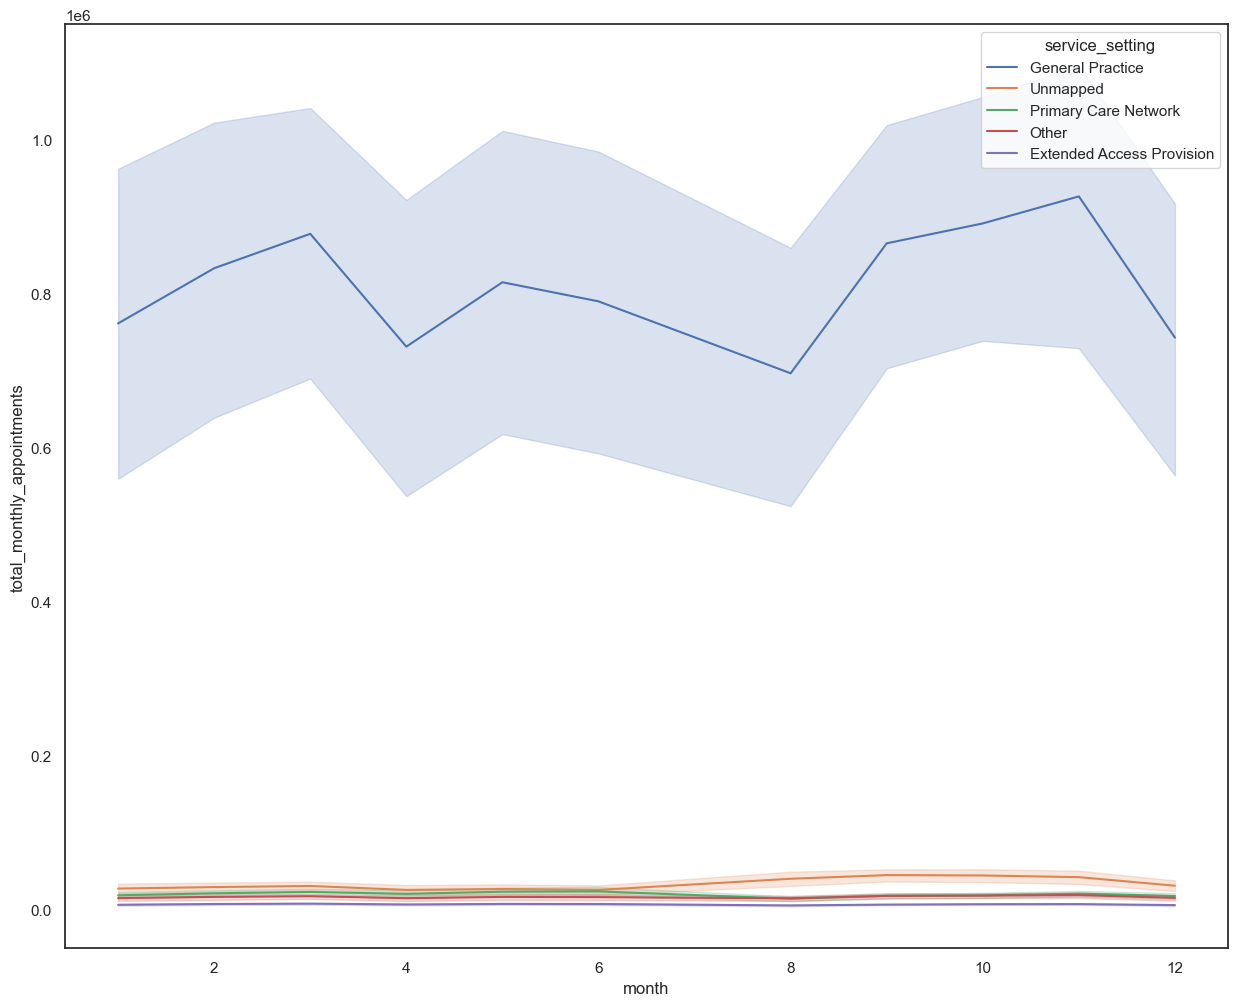

In [13]:
# Plot the appointments over the available date range, and review the service settings for months.

# Create a lineplot.
total_monthly_appointments_ss = nc_ss['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'service_setting', data=nc_ss)

**Context types:**

In [14]:
# Create a subset of the nc DataFrame to look at context type.
# Selecting few columns.

nc_ct_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['context_type', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month
0,2022-05-09,Care Related Encounter,16590,2022-05
1,2022-05-23,Care Related Encounter,16527,2022-05
2,2021-10-11,Care Related Encounter,16495,2021-10
3,2021-10-18,Care Related Encounter,16492,2021-10
4,2022-05-16,Care Related Encounter,16412,2022-05


In [15]:
# Extracting the year from string format date.
nc_ct_subset['year'] = pd.DatetimeIndex(nc_ct_subset['appointment_date']).year
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month,year
0,2022-05-09,Care Related Encounter,16590,2022-05,2022
1,2022-05-23,Care Related Encounter,16527,2022-05,2022
2,2021-10-11,Care Related Encounter,16495,2021-10,2021
3,2021-10-18,Care Related Encounter,16492,2021-10,2021
4,2022-05-16,Care Related Encounter,16412,2022-05,2022


In [16]:
# Creating a new column with month of date field 'appointment_date'.
nc_ct_subset['month'] = pd.DatetimeIndex(nc_ct_subset['appointment_date']).month
nc_ct_subset.head()

,appointment_date,context_type,count_of_appointments,appointment_month,year,month
0,2022-05-09,Care Related Encounter,16590,2022-05,2022,5
1,2022-05-23,Care Related Encounter,16527,2022-05,2022,5
2,2021-10-11,Care Related Encounter,16495,2021-10,2021,10
3,2021-10-18,Care Related Encounter,16492,2021-10,2021,10
4,2022-05-16,Care Related Encounter,16412,2022-05,2022,5


In [17]:
# Aggregate on monthly level and determine the sum of records per month.
# Grouping the nc DataFrame by 'service_setting', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_ct_subset= pd.DataFrame(nc_ct_subset.groupby(['context_type','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_ct_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_ct = nc_ct_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_ct

,context_type,year,month,appointment_month,appointment_date,total_monthly_appointments
106,Care Related Encounter,2021,11,2021-11,2021-11-15,1279452
99,Care Related Encounter,2021,11,2021-11,2021-11-08,1276802
295,Care Related Encounter,2022,5,2022-05,2022-05-23,1272572
288,Care Related Encounter,2022,5,2022-05,2022-05-16,1271910
71,Care Related Encounter,2021,10,2021-10,2021-10-11,1271753
...,...,...,...,...,...,...
341,Inconsistent Mapping,2021,8,2021-08,2021-08-08,293
348,Inconsistent Mapping,2021,8,2021-08,2021-08-15,277
976,Unmapped,2022,6,2022-06,2022-06-05,243
355,Inconsistent Mapping,2021,8,2021-08,2021-08-22,236


/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/3759721846.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x='month', y='total_monthly_appointments', hue= 'context_type', data=nc_ct, ci=0)


<Axes: xlabel='month', ylabel='total_monthly_appointments'>

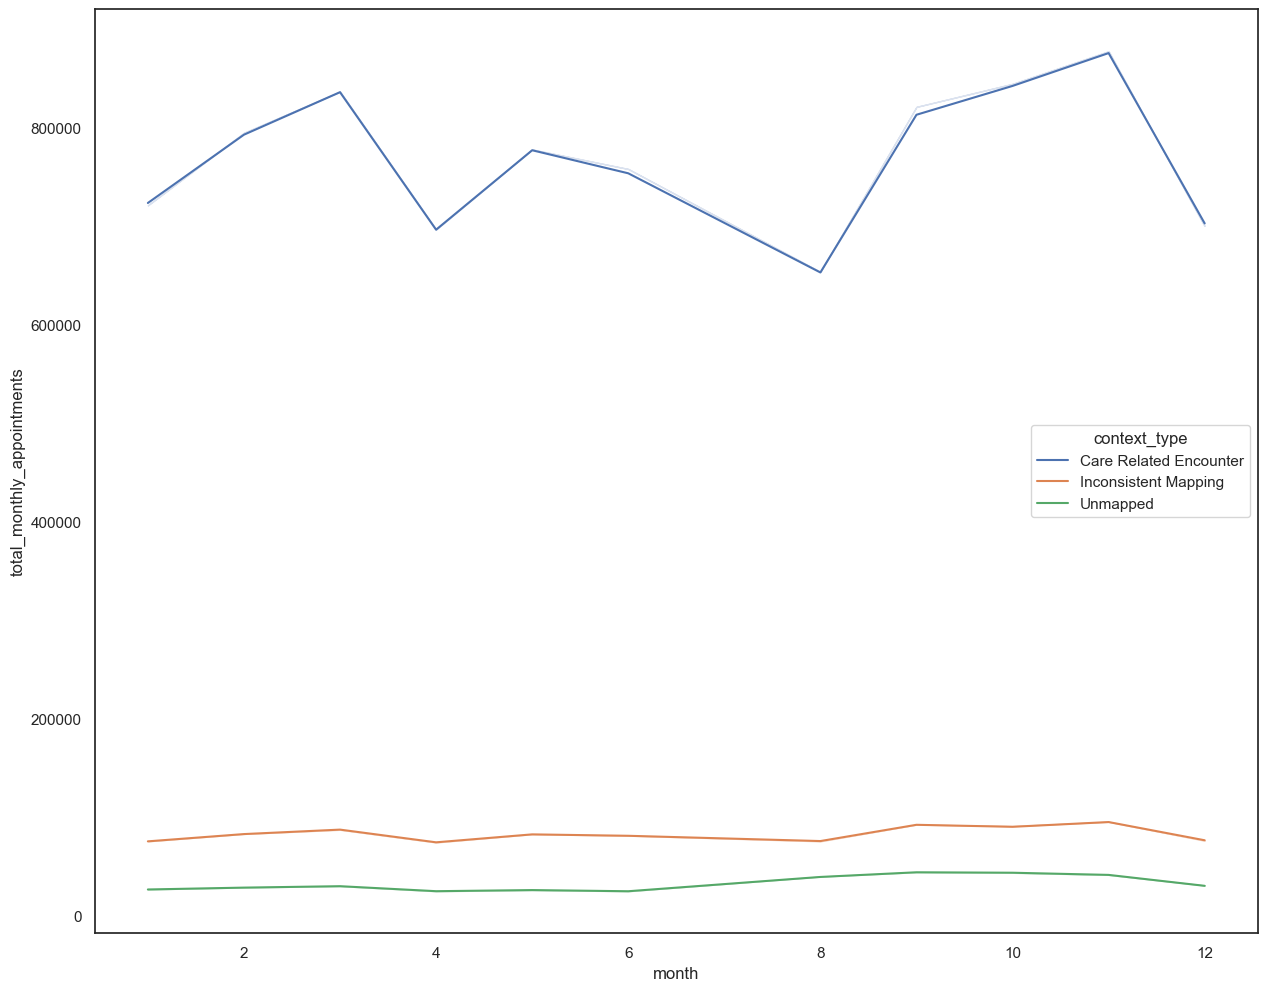

In [19]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
total_monthly_appointments_ct = nc_ct['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'context_type', data=nc_ct, ci=0)

**National categories:**

In [20]:
# Create a subset of the nc DataFrame to look at the national categories.
# Selecting few columns.

nc_nc_subset = pd.read_excel('national_categories.xlsx', 
                            usecols=['national_category', 'count_of_appointments', 'appointment_date','appointment_month'])

# Print the DataFrame.
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month
0,2022-05-09,General Consultation Routine,16590,2022-05
1,2022-05-23,General Consultation Routine,16527,2022-05
2,2021-10-11,General Consultation Routine,16495,2021-10
3,2021-10-18,General Consultation Routine,16492,2021-10
4,2022-05-16,General Consultation Routine,16412,2022-05


In [21]:
# Extracting the year from string format date.
nc_nc_subset['year'] = pd.DatetimeIndex(nc_nc_subset['appointment_date']).year
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month,year
0,2022-05-09,General Consultation Routine,16590,2022-05,2022
1,2022-05-23,General Consultation Routine,16527,2022-05,2022
2,2021-10-11,General Consultation Routine,16495,2021-10,2021
3,2021-10-18,General Consultation Routine,16492,2021-10,2021
4,2022-05-16,General Consultation Routine,16412,2022-05,2022


In [22]:
# Creating a new column with month of date field 'appointment_date'.
nc_nc_subset['month'] = pd.DatetimeIndex(nc_nc_subset['appointment_date']).month
nc_nc_subset.head()

,appointment_date,national_category,count_of_appointments,appointment_month,year,month
0,2022-05-09,General Consultation Routine,16590,2022-05,2022,5
1,2022-05-23,General Consultation Routine,16527,2022-05,2022,5
2,2021-10-11,General Consultation Routine,16495,2021-10,2021,10
3,2021-10-18,General Consultation Routine,16492,2021-10,2021,10
4,2022-05-16,General Consultation Routine,16412,2022-05,2022,5


In [23]:
# Aggregate on monthly level and determine the sum of records per month.
# Grouping the nc DataFrame by 'national_category', 'year' and 'month'.
# And aggregating the 'count of appointments' to monthly counts.

nc_nc_subset= pd.DataFrame(nc_nc_subset.groupby(['national_category','year','month', 'appointment_month', 'appointment_date',]).count_of_appointments.sum().reset_index(name='total_monthly_appointments'))
nc_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

# Create a new nc DataFrame that can be used in future weeks.
nc_nc = nc_nc_subset.sort_values(['total_monthly_appointments'],ascending=False)

# View the output.
nc_nc

,national_category,year,month,appointment_month,appointment_date,total_monthly_appointments
1616,General Consultation Routine,2022,5,2022-05,2022-05-23,490451
1609,General Consultation Routine,2022,5,2022-05,2022-05-16,488260
1602,General Consultation Routine,2022,5,2022-05,2022-05-09,487037
1637,General Consultation Routine,2022,6,2022-06,2022-06-13,482193
1539,General Consultation Routine,2022,3,2022-03,2022-03-07,480732
...,...,...,...,...,...,...
145,Care Home Needs Assessment & Personalised Care...,2021,12,2021-12,2021-12-26,1
2666,Non-contractual chargeable work,2021,11,2021-11,2021-11-28,1
1893,Home Visit,2021,8,2021-08,2021-08-01,1
1764,Group Consultation and Group Education,2022,1,2022-01,2022-01-03,1


/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/1839645823.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x='month', y='total_monthly_appointments', hue= 'national_category', data=nc_nc, ci=0)


<Axes: xlabel='month', ylabel='total_monthly_appointments'>

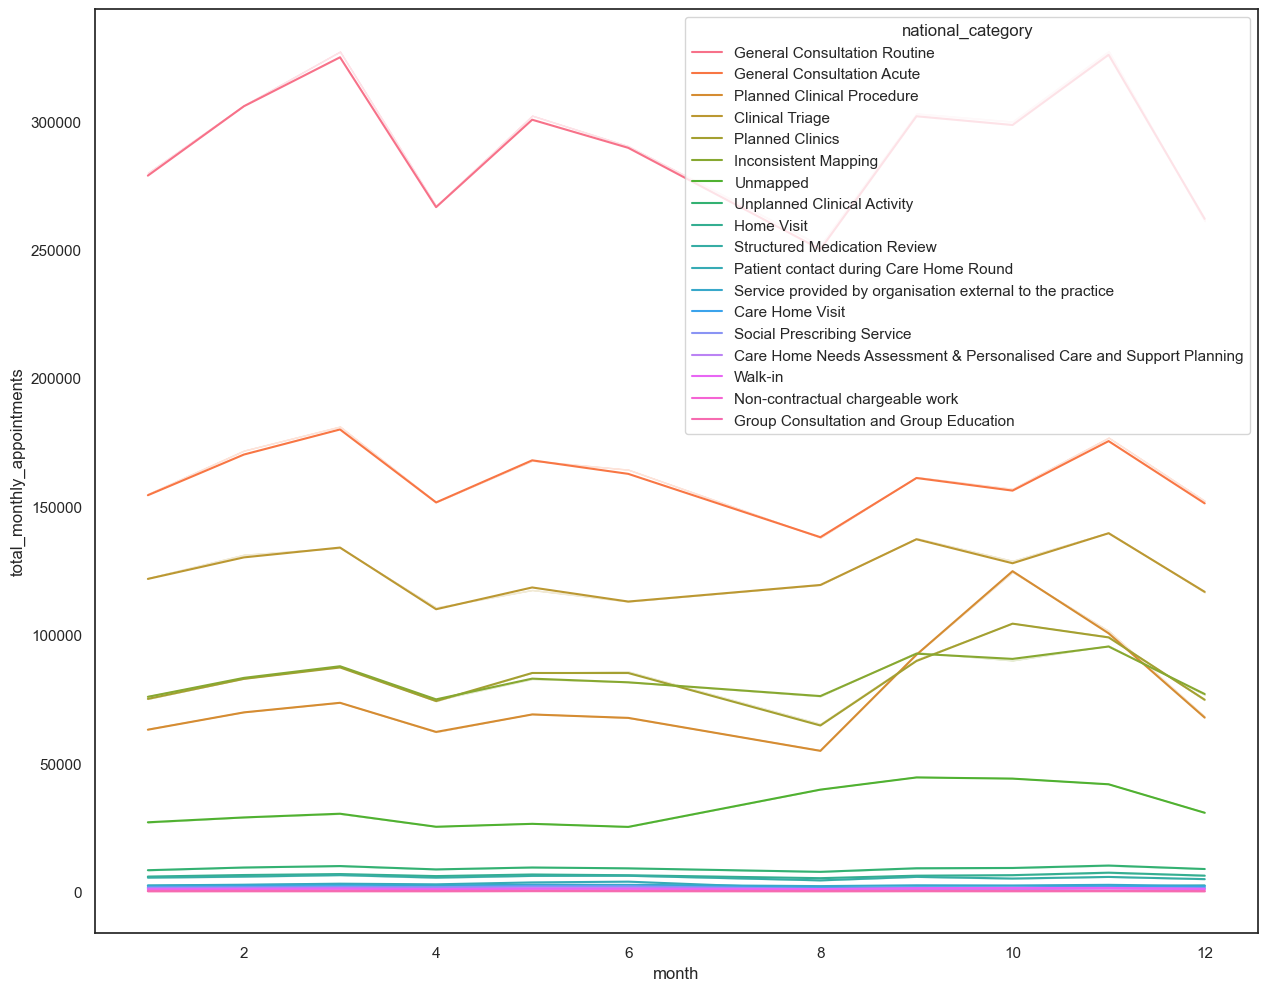

In [24]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
total_monthly_appointments_nc = nc_nc['total_monthly_appointments']
sns.lineplot(x='month', y='total_monthly_appointments', hue= 'national_category', data=nc_nc, ci=0)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [43]:
# View the output.
nc_ss
print(nc_ss.dtypes)
nc_ss

service_setting                       object
year                                   int64
month                                  int64
appointment_month                     object
appointment_date              datetime64[ns]
total_monthly_appointments             int64
dtype: object


,service_setting,year,month,appointment_month,appointment_date,total_monthly_appointments
440,General Practice,2021,11,2021-11,2021-11-15,1355190
433,General Practice,2021,11,2021-11,2021-11-08,1354605
405,General Practice,2021,10,2021-10,2021-10-11,1352082
412,General Practice,2021,10,2021-10,2021-10-18,1340464
447,General Practice,2021,11,2021-11,2021-11-22,1335782
...,...,...,...,...,...,...
147,Extended Access Provision,2021,12,2021-12,2021-12-26,229
1155,Primary Care Network,2022,1,2022-01,2022-01-01,215
1031,Primary Care Network,2021,8,2021-08,2021-08-30,195
1150,Primary Care Network,2021,12,2021-12,2021-12-27,182


/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/1079095596.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=summer, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Summer 2021 - Appointments")


Text(0.5, 1.0, 'Summer 2021 - Appointments')

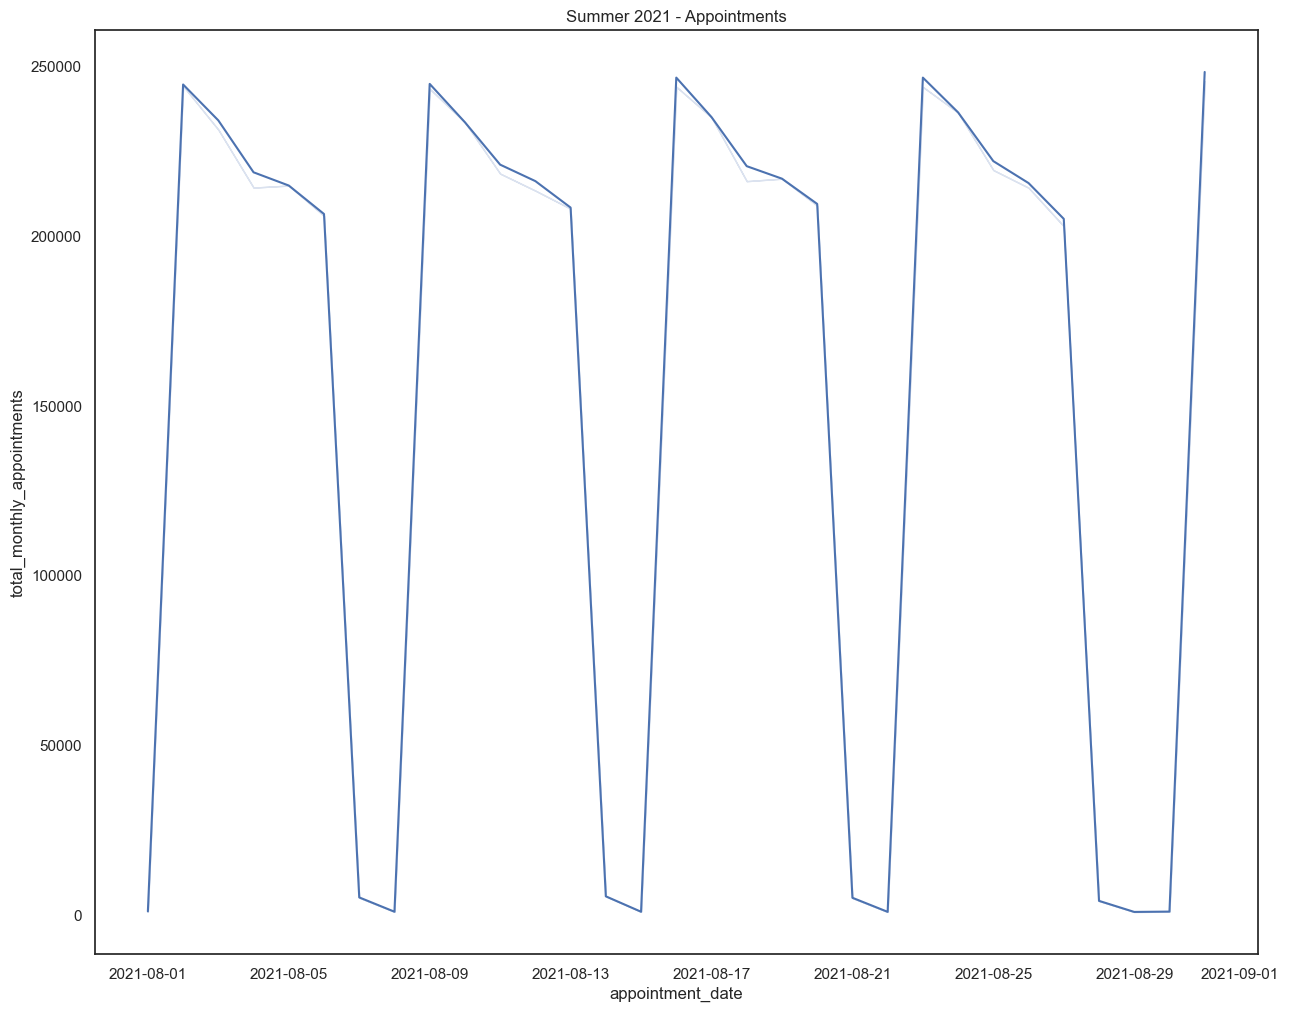

In [63]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
summer = nc_ss.query("appointment_month =='2021-08'")
sns.lineplot(data=summer, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Summer 2021 - Appointments")

**Autumn (October 2021):**

/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/2129561009.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=autumn, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Autumn 2021 - Appointments")


Text(0.5, 1.0, 'Autumn 2021 - Appointments')

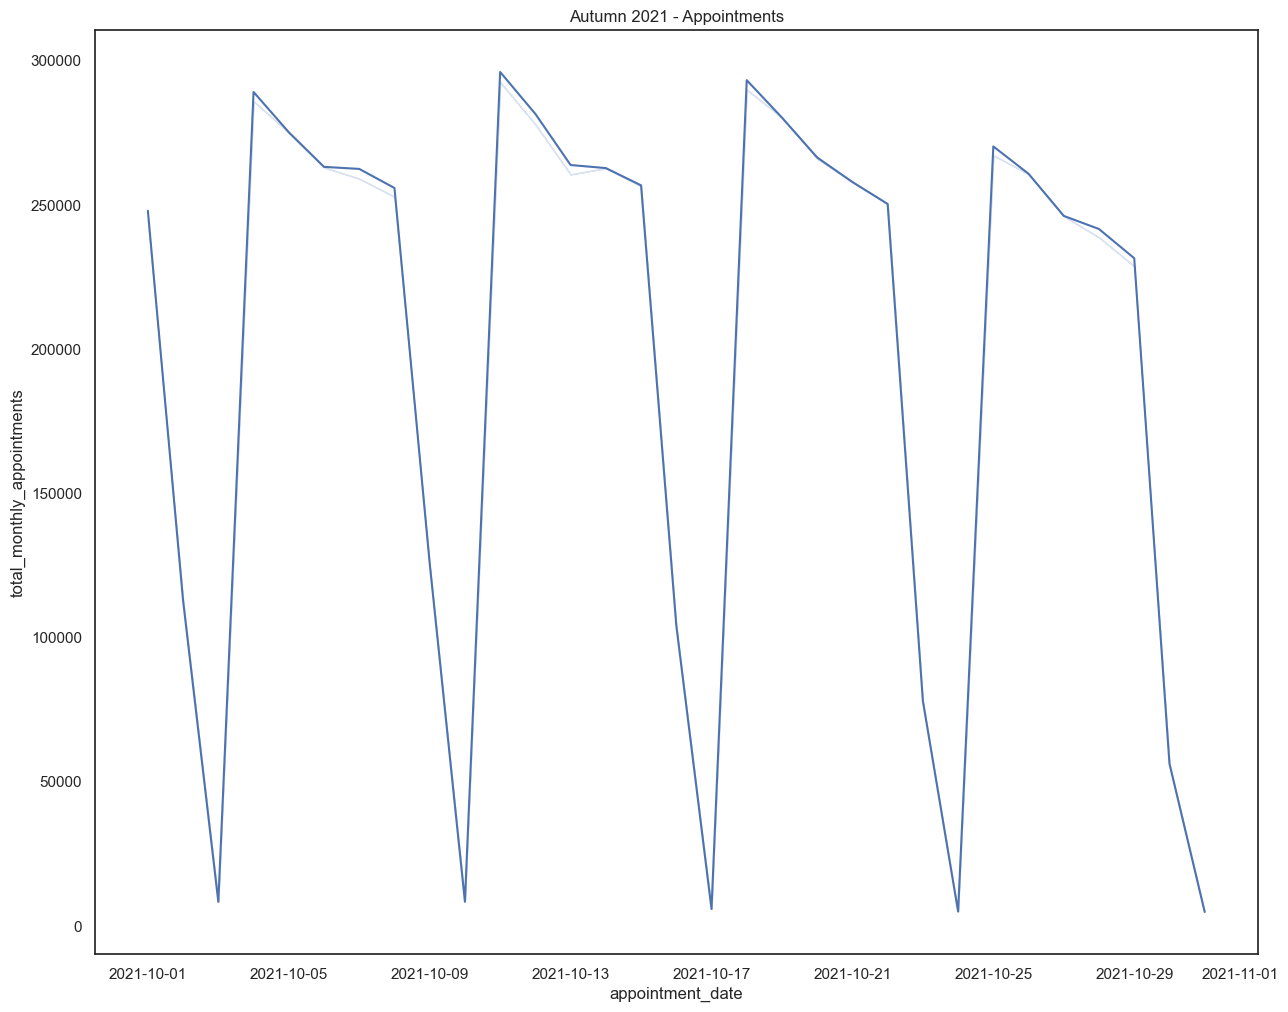

In [62]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
autumn = nc_ss.query("appointment_month =='2021-10'")
sns.lineplot(data=autumn, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Autumn 2021 - Appointments")

**Winter (January 2022):**

/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/316214659.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=winter, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Winter 2022 - Appointments")


Text(0.5, 1.0, 'Winter 2022 - Appointments')

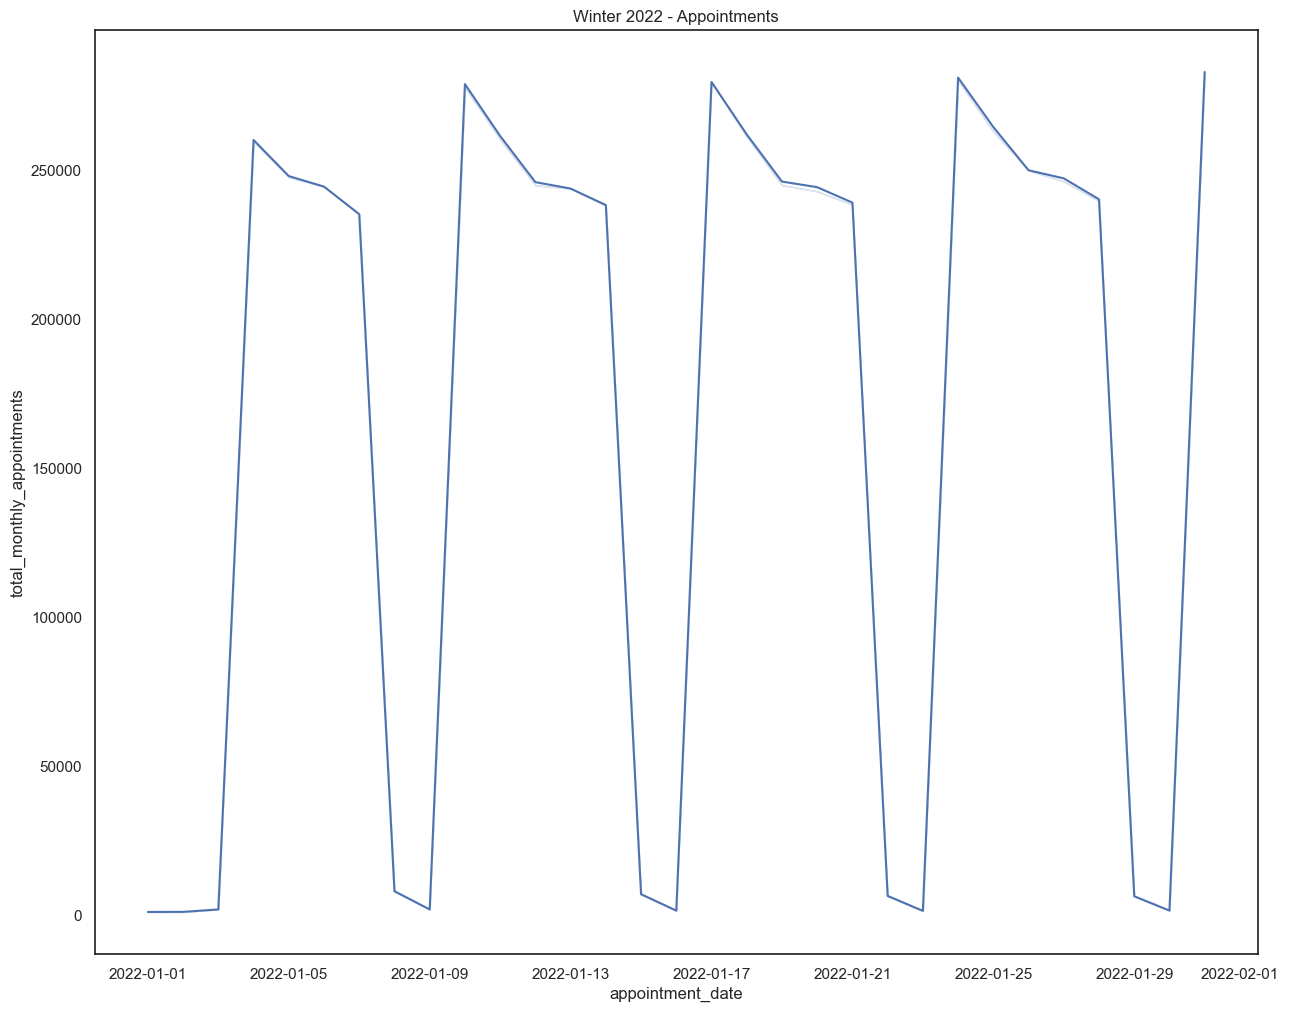

In [61]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
winter = nc_ss.query("appointment_month =='2022-01'")
sns.lineplot(data=winter, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Winter 2022 - Appointments")

**Spring (April 2022):**

/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T/ipykernel_11599/2957783011.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=spring, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Spring 2022 - Appointments")


Text(0.5, 1.0, 'Spring 2022 - Appointments')

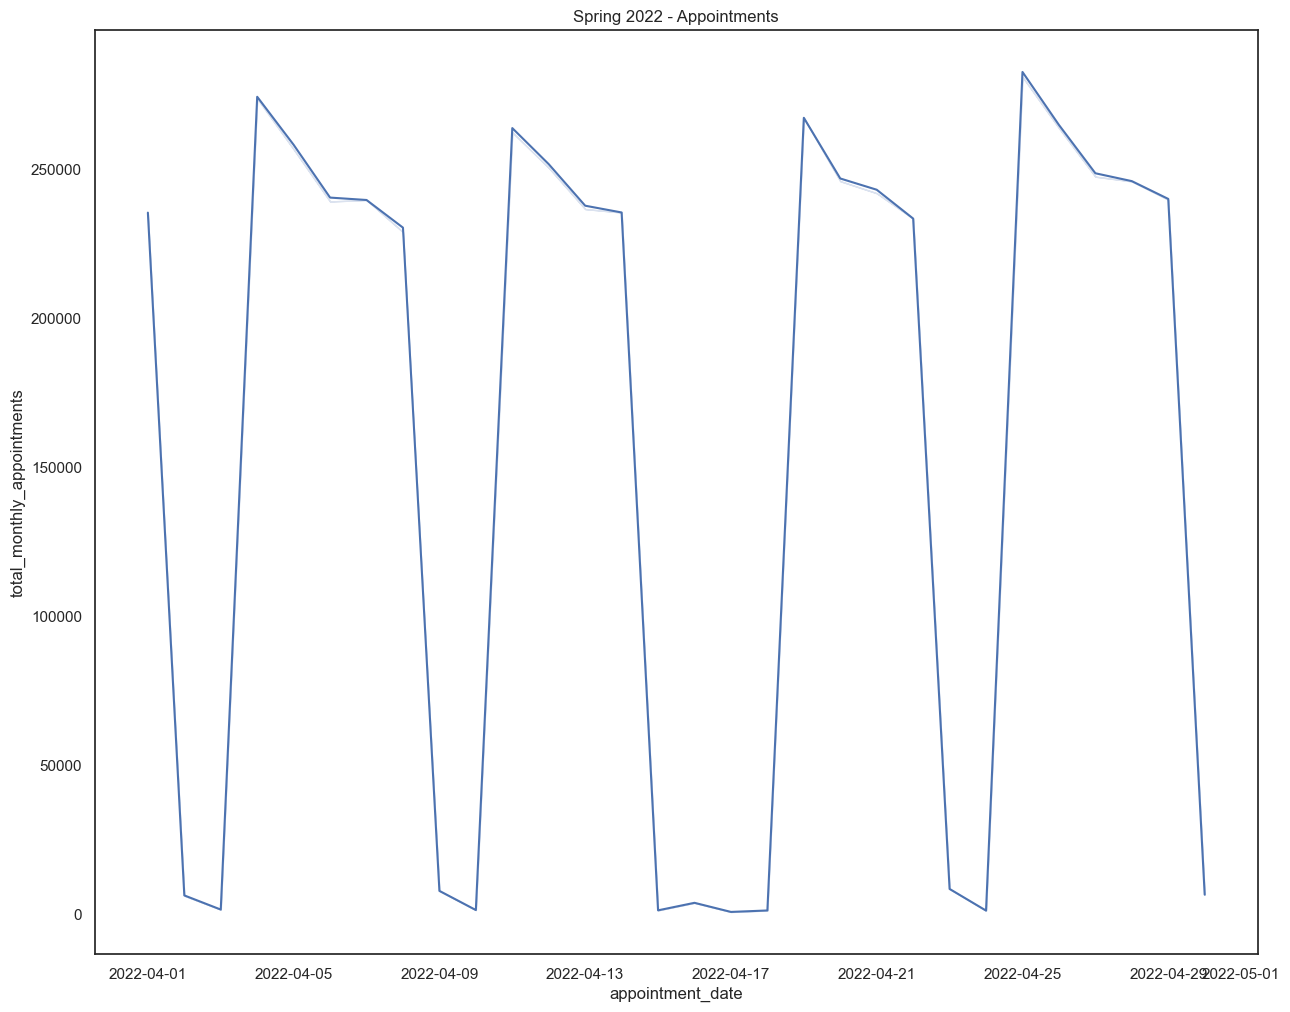

In [60]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
spring = nc_ss.query("appointment_month =='2022-04'")
sns.lineplot(data=spring, x="appointment_date", y="total_monthly_appointments", ci=0).set_title("Spring 2022 - Appointments")

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [ ]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [ ]:
# Load the data set.


# View the DataFrame.


In [ ]:
# Explore the metadata.


In [ ]:
# Explore the data set.


In [ ]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [ ]:
# Create a new DataFrame containing only the text.


# View the DataFrame.


In [ ]:
# Loop through the messages, and create a list of values containing the # symbol.


In [ ]:
# Display the first 30 records.


In [ ]:
# Convert the series to a DataFrame in preparation for visualisation.


# Rename the columns.


In [ ]:
# Fix the count datatype.


# View the result.


In [ ]:
# Display records where the count is larger than 10.


In [ ]:
# Create a Seaborn barplot indicating records with a count >10 records.


In [ ]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.


In [ ]:
# Print the min and max dates.


In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.


# View the DataFrame.


In [ ]:
# Determine the total number of appointments per month.


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


In [ ]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


In [ ]:
# Plot monthly capacity utilisation.


# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.


**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.


**Question 6:** How do the spread of service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


In [1]:
# Create a boxplot to investigate spread of service settings.


In [ ]:
# Create a boxplot to investigate the service settings without GP.


# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.